Modify the scratch code of K-means clustering in our lecture:
- Modify so it print out the total within-cluster variation.  Then try to run several k and identify which k is best.
- Since k-means can be slow due to its pairwise computations, let's implement a mini-batch k-means in which the cluster is create using only partial subset of samples.
- Put everything into a class

Mini-Batch will rarely converge, thus it is important to add a max_iteration or some tolerance.  Last, theoretically speaking, Mini-Batch will never perform better in terms of accuracy when compare to K-means, but it is very close to optimal but will almost always beat K-means in terms of time given large dataset and a modest tolerance parameter.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from time import time

In [2]:
X, y_true = make_blobs(n_samples=1500, centers=4,
                       cluster_std=0.60, random_state=0)

class KMeanMini():
    def __init__(self, n_clusters, batch_size=200, max_iter=100):
        self.n_clusters = n_clusters
        self.batch_size = batch_size
        self.max_iter = max_iter
        self.centers = None
        pass
    
    def fit(self, X):
        m, n = X.shape
        
        #1. randomly choose n clusters from X
        #you can also randomly generate any two points
        rng = np.random.RandomState(42)
        i = rng.permutation(m)[:self.n_clusters]
        self.centers = X[i]

        iteration = 0

        for ix in np.arange(self.max_iter):
            #pre-step random X from dataset
            random = rng.randint(m)
            X_batch = X[random:random+self.batch_size]
            
            #2. assign lables based on closest center
            #return the index of centers having smallest
            #distance with X
            labels = pairwise_distances_argmin(X_batch, self.centers)

            #3. find new centers
            new_centers = []
            for i in range(self.n_clusters):
                new_centers.append(X_batch[labels == i].mean(axis=0))

            #convert list to np.array; you can actually combine #3
            #with np.array in one sentence 
            new_centers = np.array(new_centers)

            #plotting purpose
            #plot every 5th iteration to save space
            #remove this if, if you want to see each snapshot
#             if (iteration % 5 == 0):
#                 pred = pairwise_distances_argmin(X_batch, new_centers)
#                 plt.figure(figsize=(5, 2))
#                 plt.title(f"Iteration: {iteration}")
#                 plt.scatter(X_batch[:, 0], X_batch[:, 1], c=pred)
#                 plt.scatter(new_centers[:, 0], new_centers[:, 1], s=100, c="black", alpha=0.6)

            #4 stopping criteria - if centers do not 
            #change anymore, we stop!
            if(np.allclose(self.centers, new_centers, rtol=0.2)):
                break
            else:
                self.centers = new_centers
                iteration+=1

        total_with_variation_score = 0
        labels = pairwise_distances_argmin(X, self.centers) #<---Note I use X here.  Why?
        for i in range(self.n_clusters):
            cluster_mean = X[labels==i].mean(axis=0)
            total_with_variation_score += ((X[labels==i] - cluster_mean)** 2).sum()
            
        print("Total with variation score: ", total_with_variation_score)
        
        print(f"Done in {ix} iterations")
        
    def predict(self, X):
        return pairwise_distances_argmin(X, self.centers)

Total with variation score:  3257.699484066179
Done in 1 iterations
Fit and predict time: 0.028086185455322266


Text(0.5, 1.0, 'Final result')

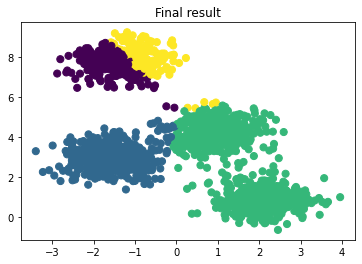

In [3]:
start = time()
model = KMeanMini(n_clusters=4)
model.fit(X)
preds = model.predict(X)
print(f"Fit and predict time: {time() - start}")
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=preds, s=50)
plt.title("Final result")

In [4]:
for k in range(2, 7):
    print(f"=====k = {k}")
    start = time()
    model = KMeanMini(k)
    model.fit(X)
    preds = model.predict(X)
    print(f"Fit and predict time {time() - start}")

=====k = 2
Total with variation score:  5805.956171486396
Done in 3 iterations
Fit and predict time 0.006056785583496094
=====k = 3
Total with variation score:  3345.3591017284866
Done in 1 iterations
Fit and predict time 0.0035250186920166016
=====k = 4
Total with variation score:  3257.699484066179
Done in 1 iterations
Fit and predict time 0.003636598587036133
=====k = 5
Total with variation score:  930.7871727973102
Done in 1 iterations
Fit and predict time 0.004233598709106445
=====k = 6
Total with variation score:  855.0193263562159
Done in 2 iterations
Fit and predict time 0.004019975662231445
